Завдання 1
​У цьому завданні вам потрібно завантажити ось цей датасет. Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

Завдання 2
Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоритмом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [227]:
# read data from csv to dataframe
data_2d = pd.read_csv('data_2d.csv')
mnist = pd.read_csv('mnist.csv')

**Data2d dataset**

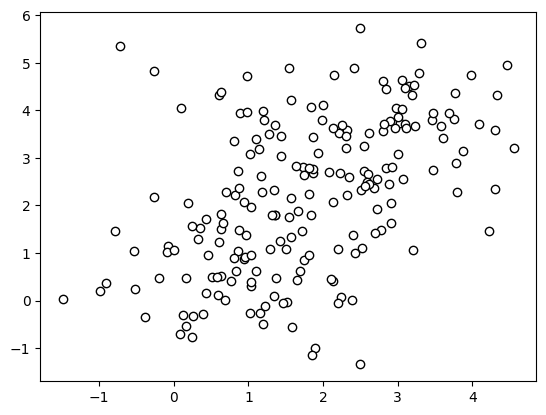

In [228]:
y_data_2d = data_2d[data_2d.columns[0]].to_numpy()
X_data_2d = data_2d[data_2d.columns[1:3]].to_numpy()

plt.scatter(
    X_data_2d[:,0],X_data_2d[:,1],
    c='white',
    edgecolors='black'
)
plt.show()

**elbow data_2d not normilized**

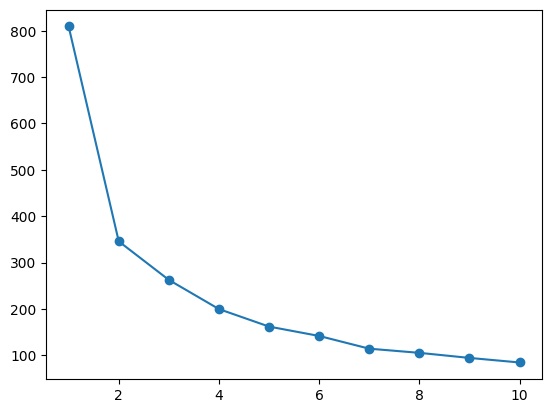

In [229]:
inertia_values = []
for i in range(1,11):
    kmeans = KMeans(
                n_clusters=i, 
                init= 'random', 
                n_init='auto', 
                max_iter=5, 
                tol=0.00001, 
                random_state=42
                )
    y_data_2d_km = kmeans.fit_predict(X_data_2d)
    inertia_values.append(kmeans.inertia_) # загально групова сума квадратів. чим менша тим краще

plt.plot(range(1,11),inertia_values,marker='o')
plt.show()
# 2 Cluster is optimal

In [230]:
# KMeans for data2D not normilized data. 2 clusters
from sklearn.metrics import accuracy_score
k=2
kmeans_data2d = KMeans(n_clusters=k, 
                init= 'random', 
                n_init=1, 
                max_iter=4, 
                tol=0.00001, 
                random_state=2)

y_data_2d_km = kmeans_data2d.fit_predict(X_data_2d)
print(f"{kmeans_data2d.labels_=}")
print(f"{kmeans_data2d.cluster_centers_=}")
print("Train accuracy:", accuracy_score(y_data_2d_km,y_data_2d))


kmeans_data2d.labels_=array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int32)
kmeans_data2d.cluster_centers_=array([[0.94503494, 0.74212657],
       [2.44034309, 3.41627461]])
Train accuracy: 0.8994974874371859


**Data2d visualization**

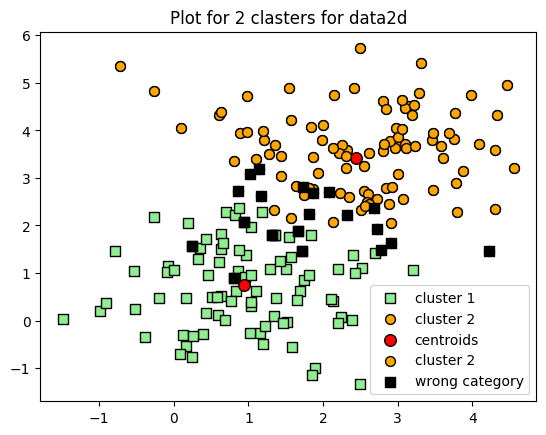

In [231]:
plt.scatter(
    X_data_2d[y_data_2d_km == 0, 0], X_data_2d[y_data_2d_km == 0,1],
    s=50, c='lightgreen',
    marker='s', edgecolors='black',
    label='cluster 1'
)

plt.scatter(
    X_data_2d[y_data_2d_km == 1, 0], X_data_2d[y_data_2d_km == 1,1],
    s=50, c='orange',
    marker='o', edgecolors='black',
    label='cluster 2'
)

plt.scatter(
    kmeans_data2d.cluster_centers_[:,0],kmeans_data2d.cluster_centers_[:,1],
    s=70,
    marker='o',
    c='red',
    edgecolors='black',
    label='centroids'
)

plt.scatter(
    X_data_2d[y_data_2d_km == 1, 0], X_data_2d[y_data_2d_km == 1,1],
    s=50, c='orange',
    marker='o', edgecolors='black',
    label='cluster 2'
)

plt.scatter(
    X_data_2d[y_data_2d_km != y_data_2d, 0], X_data_2d[y_data_2d_km!=y_data_2d,1],
    s=50, c='black',
    marker='s', edgecolors='black',
    label='wrong category'
)

plt.title(label=f'Plot for {k} clasters for data2d')
plt.legend(scatterpoints=1)
plt.show()

**PCA зменшення розмірності для mnist**

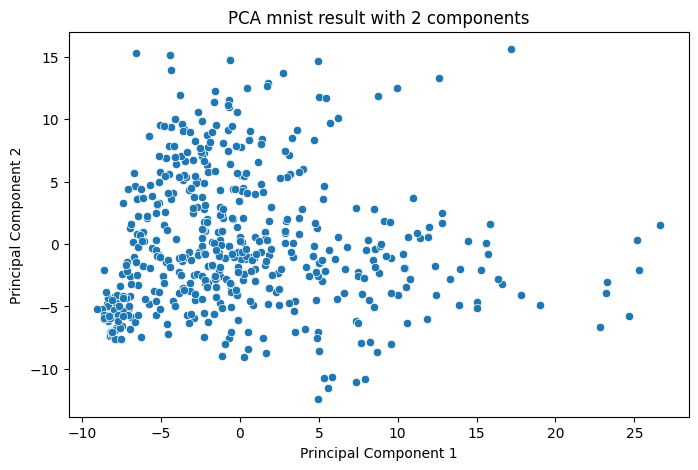

In [232]:
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# normilizing data
mnist_norm = StandardScaler().fit_transform(mnist) 

pca_mnist = PCA(n_components=2)
principal_components_mnist = pca_mnist.fit_transform(mnist_norm)
principal_df_mnist = pd.DataFrame(data=principal_components_mnist,columns = ['Principal Component 1','Principal Component 2'])

plt.figure(figsize=(8,5))
sns.scatterplot(data=principal_df_mnist,x = 'Principal Component 1',y='Principal Component 2')
plt.title('PCA mnist result with 2 components')
plt.show()

**kMeans and Elbow method for mnist**

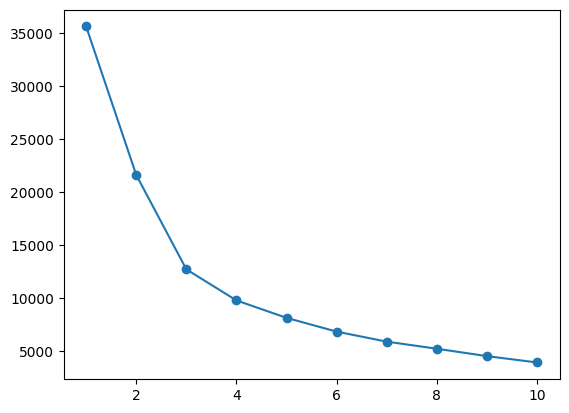

In [236]:
#  elbow method to define optimal qty of clusters
inertia_values = []
for i in range(1,11):
    kmeans_mnist = KMeans(
                n_clusters=i, 
                init= 'random', 
                n_init='auto', 
                max_iter=5, 
                tol=0.00001, 
                random_state=42
                )
    y_km = kmeans_mnist.fit_predict(X)
    inertia_values.append(kmeans_mnist.inertia_) # загально групова сума квадратів. чим менша тим краще

plt.plot(range(1,11),inertia_values,marker='o')
plt.show()

In [234]:
# Оптимальна кількість кластерів 3 або 4.
k=3

X_mnist = principal_components_mnist

kmeans_mnist = KMeans(n_clusters=k, 
                init= 'random', 
                n_init=1, 
                max_iter=4, 
                tol=0.00001, 
                random_state=2)

y_mnist_km = kmeans_mnist.fit_predict(X)
print(f"{kmeans_mnist.labels_=}")
print(f"{kmeans_mnist.cluster_centers_=}")


kmeans_mnist.labels_=array([1, 0, 1, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 2, 2, 1, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 2, 2, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 1,
       2, 0, 1, 2, 1, 1, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 2, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 0, 0, 1, 1,
       2, 0, 0, 1, 0, 1, 2, 0, 2, 2, 0, 2, 0, 2, 1, 1, 0, 2, 2, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 1, 1, 2, 0, 1, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 2,
       1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 2,
       1, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 1,
       2, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 2, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 0, 0, 2, 1, 2, 0, 1,

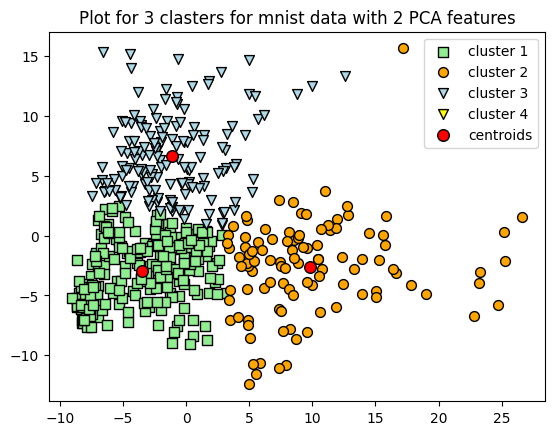

In [235]:
plt.scatter(
    X_mnist[y_mnist_km == 0, 0], X_mnist[y_mnist_km==0,1],
    s=50, c='lightgreen',
    marker='s', edgecolors='black',
    label='cluster 1'
)

plt.scatter(
    X_mnist[y_mnist_km == 1, 0], X_mnist[y_mnist_km==1,1],
    s=50, c='orange',
    marker='o', edgecolors='black',
    label='cluster 2'
)

plt.scatter(
    X_mnist[y_mnist_km == 2, 0], X_mnist[y_mnist_km==2,1],
    s=50, c='lightblue',
    marker='v', edgecolors='black',
    label='cluster 3'
)


plt.scatter(
    X_mnist[y_mnist_km == 3, 0], X_mnist[y_mnist_km==3,1],
    s=50, c='yellow',
    marker='v', edgecolors='black',
    label='cluster 4'
)

plt.scatter(
    kmeans_mnist.cluster_centers_[:,0],kmeans_mnist.cluster_centers_[:,1],
    s=70,
    marker='o',
    c='red',
    edgecolors='black',
    label='centroids'
)
plt.title(label=f'Plot for {k} clasters for mnist data with 2 PCA features')
plt.legend(scatterpoints=1)